![title](sea1.png)

# Sea Level Predictor

Using #Pandas, #Numpy, #Matplotlib, #Scipy

###### We are going to work with a dataset of the global average sea level change since 1880.
###### We will use the data to predict the sea level change through year 2050.

We are given the follwing tasks:
* Create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
* Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
* Return the plot, with the title "Rise in Sea Level"; x label will be "Year", y label will be "Sea Level (inches)"

First of all, we need to import the libraries and functions we will need to use here:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

Then we read the .csv file and save it into a Pandas Dataframe

In [4]:
df = pd.read_csv('epa-sea-level.csv')

Our first task is to create a scatter plot using columns "Years" on x-axis and "CSIRO Adjusted Sea Level"on y-axis.
We can create a scatter plot using Matplotlib plt.scatter(column1, column2) function.

Text(0, 0.5, 'Sea Level (inches)')

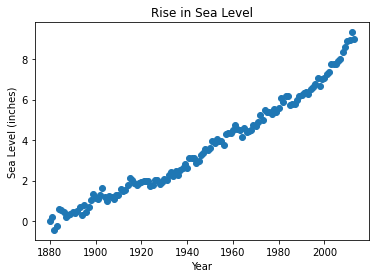

In [6]:
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')


Text(0, 0.5, 'Sea Level (inches)')

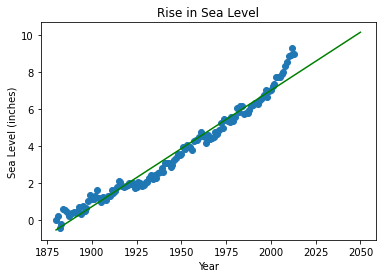

In [8]:
# In order to predict the sea level for year 2050 we first add years between 2013 and 2050 into our "Years" column.
# So that we don´t change our dataframe itself, we copy the column "Year" into another series.
# Then we create a series with the years between 2013 and 2050 with the same data type as values in original "Years" column. And in the end we concatenate our "Years" column with Series containing the new additional years up to 2050.
x = df["Year"]
year_to_add = pd.Series(np.arange(2014, 2051, 1), dtype=float) # using np.arange(start, end, step) to create new Series
x = pd.concat([x, year_to_add], ignore_index=True)

# The Pandas function linregress calculates a linear least-squares regression for two sets of measurements and returns a tuple in which the first two values are slope and intercept of the best fit line.
# For the first best fit line we use all the data from the dataframe "Year" and "CSIRO Adjusted Sea Level" columns.
result1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
# In order to make the equation of the best fit line we use the line equation y = x*m + b (m - slope, b - intercept)
# We can access the slope and the intercept of the best fit line using .slope and .intercept of lindregress result
y = (x * result1.slope) + result1.intercept
# Now we can plot y values against x values using green color.
plt.plot(x,y,"g")
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

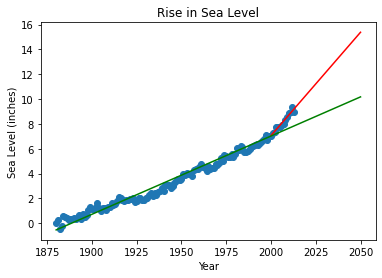

In [11]:
# For the second best fit line we need to base our prediction on the years after 2000.
# So we need to generate the line with another slope.
# We modify the "Years" we use for our x axis: we filter x to have all years after 2000.
x2 = x[x >= 2000]
# The strategy is same as for the first best fit line. However, we need to filter the columns in dataframe in order to use only years after 2000.
result2 = linregress(df["Year"][df['Year'] >= 2000], df['CSIRO Adjusted Sea Level'][df['Year'] >= 2000])
y2 = (x2 * result2.slope) + result2.intercept
# We plot the prediction line based on Sea levels from 2000 to 2013.
plt.plot(x2, y2, "r")
# We add these lines in order to have all 3 plots on the same figure.
plt.plot(x,y,"g")
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

# Finally, we can save the figure, containing the scatter plot, the prediction line based on all the years 1880-2013 in green and the prediction line based on years 2000-2013 in red.
plt.savefig('sea_level_plot.png')